In [130]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

df = pd.read_csv('Flights_dataset.csv')

# Data Preprocessing

In [131]:
print(df.head())

   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


In [132]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None


In [133]:
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)
df = df.dropna()

# EDA

In [134]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


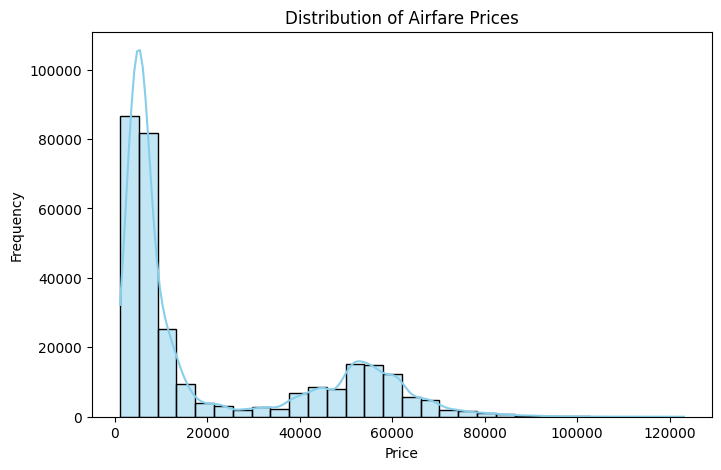

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Airfare Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<ipython-input-136-9c0bc58ba54b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts, x='Source City', y='Number of Flights', palette='viridis')


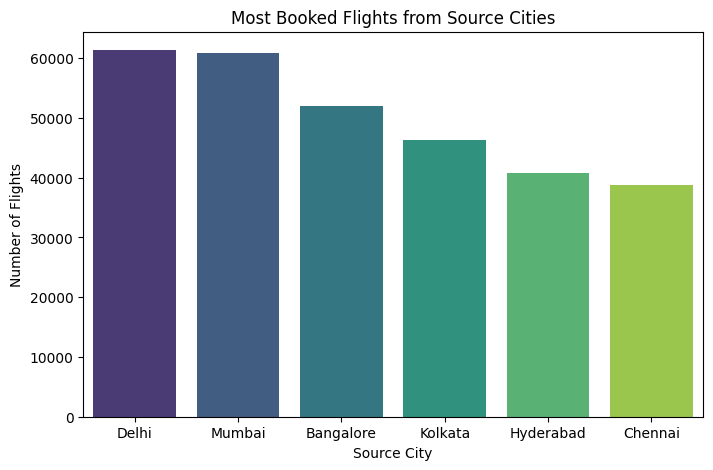

In [136]:
city_counts = df['source_city'].value_counts().reset_index()
city_counts.columns = ['Source City', 'Number of Flights']

plt.figure(figsize=(8, 5))
sns.barplot(data=city_counts, x='Source City', y='Number of Flights', palette='viridis')
plt.title('Most Booked Flights from Source Cities')
plt.ylabel('Number of Flights')
plt.xlabel('Source City')
plt.show()

**Number of Direct Flights Operated by Each Carrier from the Busiest Source Cities**

In [137]:
busy_cities = df['source_city'].value_counts().nlargest(3).index.tolist()

direct_flights = df[(df['source_city'].isin(busy_cities)) & (df['stops'] == 'zero')]

carrier_counts = direct_flights.groupby(['source_city', 'airline']).size().reset_index(name='flight_count')

print(carrier_counts)

   source_city    airline  flight_count
0    Bangalore    AirAsia           831
1    Bangalore  Air_India           779
2    Bangalore   GO_FIRST           528
3    Bangalore     Indigo          1873
4    Bangalore   SpiceJet           363
5    Bangalore    Vistara          1496
6        Delhi    AirAsia           449
7        Delhi  Air_India          2231
8        Delhi   GO_FIRST           856
9        Delhi     Indigo          2386
10       Delhi   SpiceJet           696
11       Delhi    Vistara          3472
12      Mumbai    AirAsia           222
13      Mumbai  Air_India          1209
14      Mumbai   GO_FIRST           986
15      Mumbai     Indigo          2136
16      Mumbai   SpiceJet           497
17      Mumbai    Vistara          2969


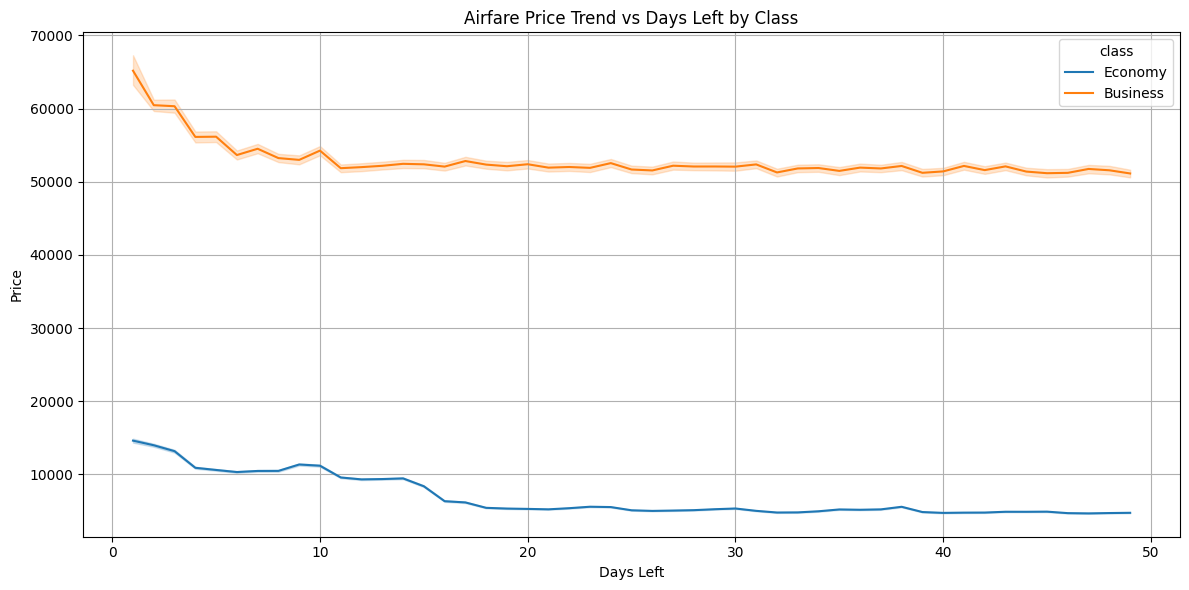

In [138]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', hue='class', data=df)
plt.title('Airfare Price Trend vs Days Left by Class')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Encoding

In [139]:
from sklearn.preprocessing import LabelEncoder

#Label Encoding
enc = ['airline', 'source_city', 'departure_time', 'stops',
                  'arrival_time', 'destination_city', 'class']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply Label Encoding
for col in enc:
    df[col] = le.fit_transform(df[col])

# Feature Selection and Scaling

In [140]:
X = df.drop('price', axis=1)
y = df['price']

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multi Collinearity Check

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False)) # ~1 No multicollinearity

            Feature       VIF
7          duration  1.319315
3             stops  1.297214
6             class  1.056260
1       source_city  1.055840
5  destination_city  1.055364
0           airline  1.041026
2    departure_time  1.015717
4      arrival_time  1.007887
8         days_left  1.002596


# Model Selection

# Linear Regression

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [145]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 49200540.29
Mean Absolute Error: 4624.994868016881
R-squared (R²): 0.9046


# Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

Ridge()

In [147]:
from sklearn.metrics import mean_squared_error

y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 49200538.32
Mean Absolute Error: 4625.001447540464
R-squared: 0.90


#XGBoost

In [148]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.02, max_depth=8, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [149]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_test = r2_score(y_test, y_test_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

mse_test = (mean_squared_error(y_test, y_test_pred))

print(f"R^2: {r2_test:.4f}")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")

R^2: 0.9437
MAE: 3718.45
MSE: 29012602.00


# Random Forest Regressor

In [150]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_train_pred=model.predict(X_train_scaled)

In [151]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1091.2635908437387
Mean Squared Error: 7770420.238232188
R² Score: 0.9849259215366715


#Actual vs Predicted Prices

In [152]:
results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})
results_df.reset_index(drop=True, inplace=True)

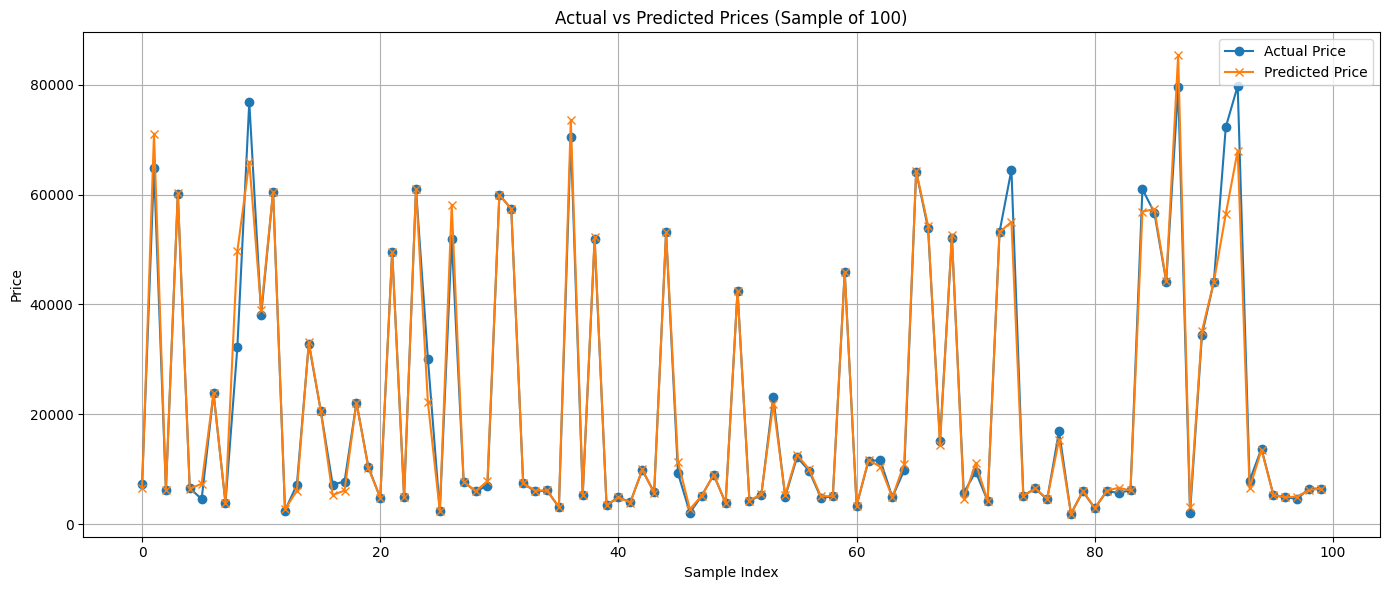

In [153]:
sample_df = results_df.head(100)

plt.figure(figsize=(14, 6))
plt.plot(sample_df['Actual Price'], label='Actual Price', marker='o')
plt.plot(sample_df['Predicted Price'], label='Predicted Price', marker='x')
plt.title('Actual vs Predicted Prices (Sample of 100)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

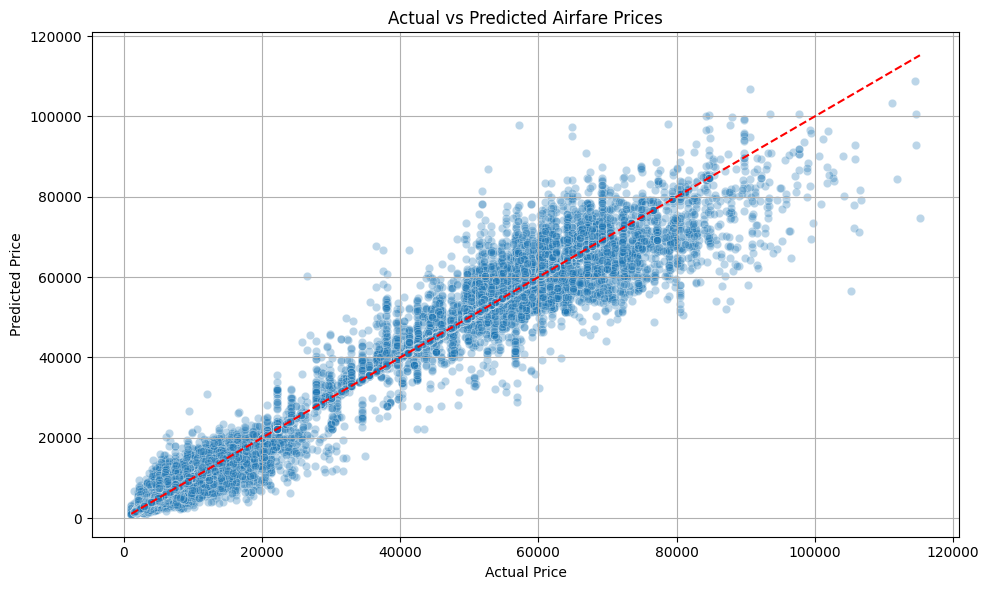

In [158]:
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airfare Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Feature Importance

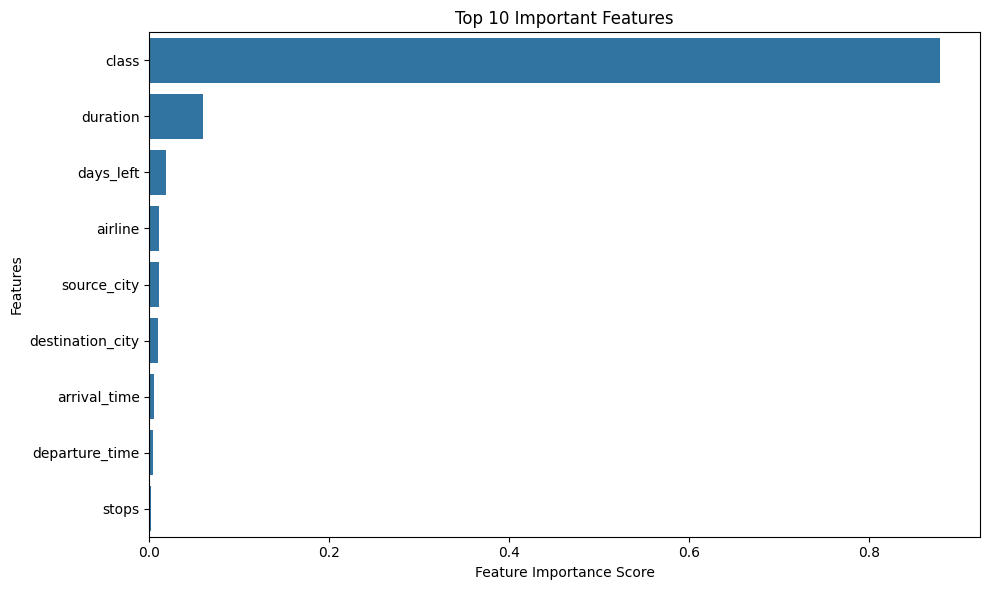

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Check for Overfitting

In [155]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("Model Evaluation Summary:")
print(f"Train R² Score       : {r2_train:.4f}")
print(f"Test R² Score        : {r2_test:.4f}")
print(f"Train MAE            : {mae_train:.2f}")
print(f"Test MAE             : {mae_test:.2f}")

Model Evaluation Summary:
Train R² Score       : 0.9975
Test R² Score        : 0.9849
Train MAE            : 423.23
Test MAE             : 1091.26


# Correlation Analysis

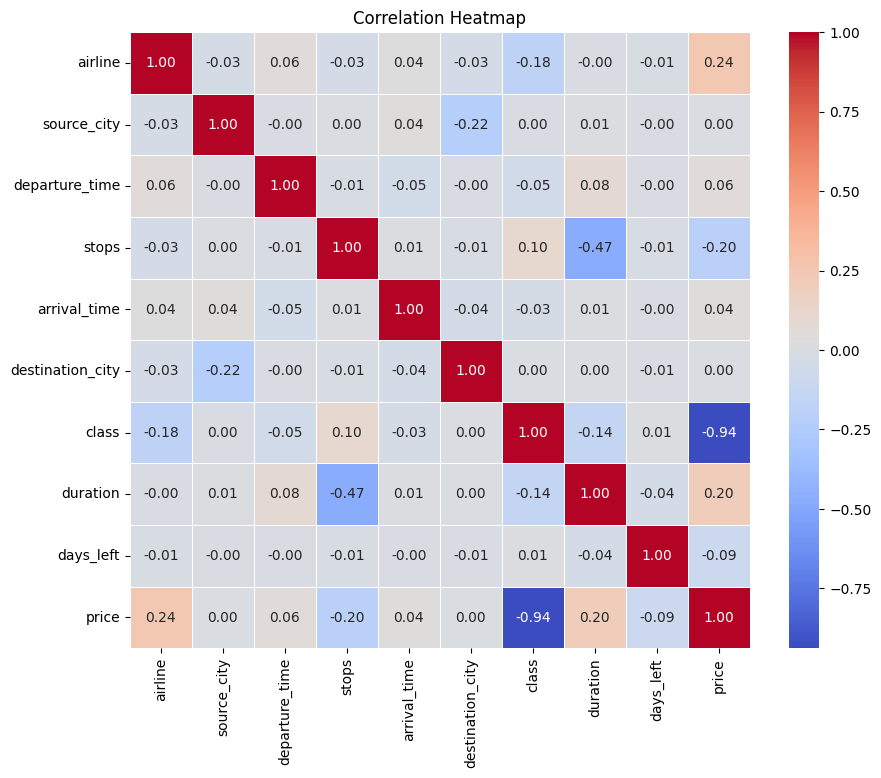

In [156]:
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()